# Cumulative Gain and Loss from the Snow depth timeseries of treatment plots from WY2023
Using the pickle files import from **3_create_tidy_pickle.ipynb**

env: running with **raster** right now since I do not need rioxarray

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns 

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime
import datetime as datetime

import csv 
import copy 
import os.path 

from mpl_toolkits.axes_grid1 import make_axes_locatable

import pickle

Open the cleaned pickle files

In [2]:
# forest and gap sites 
CNF21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNF21.pkl", "rb"))
CNG21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNG21.pkl", "rb"))
CSF21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSF21.pkl", "rb"))
CSG21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSG21.pkl", "rb"))

CNF23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNF23.pkl", "rb"))
CNG23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNG23.pkl", "rb"))
CSF23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSF23.pkl", "rb"))
CSG23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSG23.pkl", "rb"))

# the other post treatment sites 
CN20 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN20.pkl", "rb"))
CN50 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN50.pkl", "rb"))
CN60 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN60.pkl", "rb"))
CN70 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN70.pkl", "rb"))

CS20  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS20.pkl", "rb"))
CS50  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS50.pkl", "rb"))
CS60  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS60.pkl", "rb"))
CS120 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS120.pkl", "rb"))

In [3]:
# now the SDD files too
SDD_CN23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\SDD_CN23.pkl", "rb"))
SDD_CS23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\SDD_CS23.pkl", "rb"))

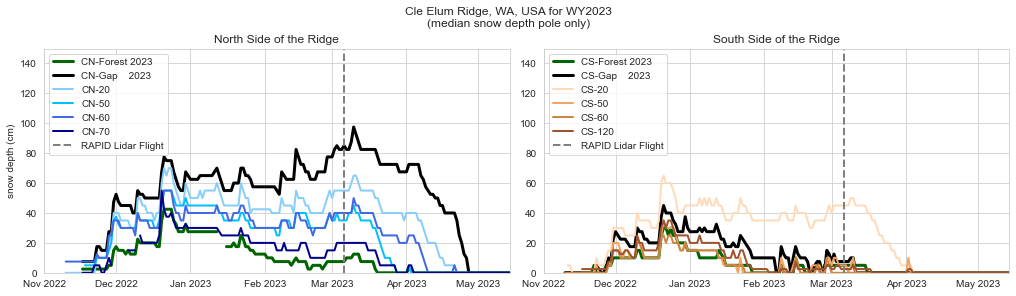

In [4]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (14,4), sharey=False, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

# colorf2 = "limegreen"
# colorg2 = "lightskyblue"

# fill between min and max if we want 
# ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg1, alpha = alpha)
# ax[1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg1, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap    2023", linewidth=3)
ax[1].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest 2023", linewidth=3)
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap    2023", linewidth=3)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = 'lightskyblue', label="CN-20", linewidth=2)
ax[0].plot(CN50['Date'], CN50['Median_depth'], color = 'deepskyblue', label="CN-50"  , linewidth=2)
ax[0].plot(CN60['Date'], CN60['Median_depth'], color = 'royalblue', label="CN-60"  , linewidth=2)
ax[0].plot(CN70['Date'], CN70['Median_depth'], color = 'darkblue', label="CN-70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = 'peachpuff', label="CS-20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = 'sandybrown', label="CS-50",  linewidth=2)
ax[1].plot(CS60['Date'], CS60['Median_depth'], color = 'peru', label="CS-60",  linewidth=2)
ax[1].plot(CS120['Date'], CS120['Median_depth'], color = 'sienna', label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)


# set plotting constants
ax[0].set_ylim(0,150)
ax[1].set_ylim(0,150)

ax[0].set_xlim([datetime.date(2020, 11, 1), datetime.date(2021, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)")
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\n(median snow depth pole only)")

ax[0].set_title("North Side of the Ridge")
ax[1].set_title("South Side of the Ridge")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

Plot the fill between for all the sites too

Plot the same BAFs on the north and south together to compare 

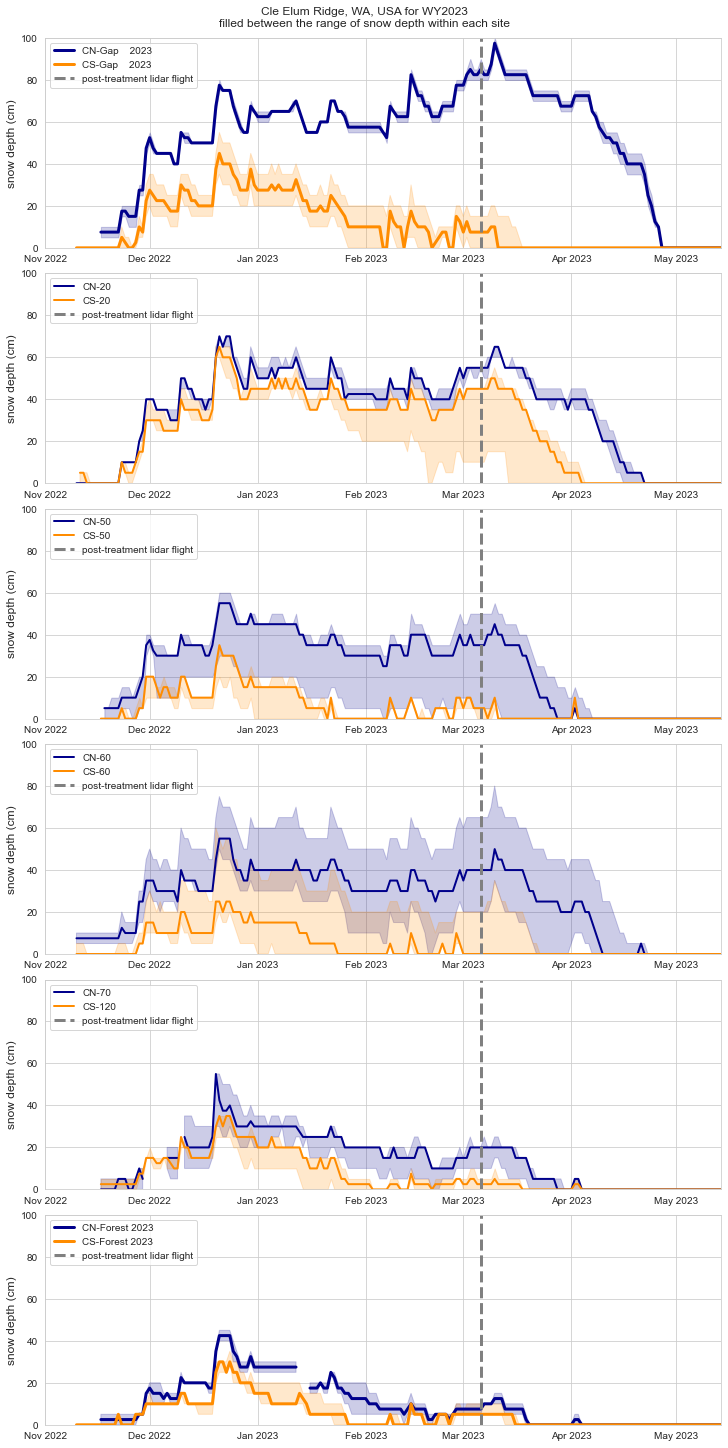

In [5]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(6,1,figsize = (10,20), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# CONTROL SITES
# fill between min and max if we want 
ax[5].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[5].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[0].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[5].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap    2023", linewidth=3)
ax[5].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
ax[0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap    2023", linewidth=3)

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[1].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[2].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[4].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[1].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[2].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[4].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[1].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[2].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[3].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[4].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[2].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[3].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[4].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[4].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[5].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[4].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[5].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[4].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[5].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[1].set_ylabel("snow depth (cm)", fontsize=12)
ax[2].set_ylabel("snow depth (cm)", fontsize=12)
ax[3].set_ylabel("snow depth (cm)", fontsize=12)
ax[4].set_ylabel("snow depth (cm)", fontsize=12)
ax[5].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')
ax[4].legend(loc='upper left')
ax[5].legend(loc='upper left')

plt.show()

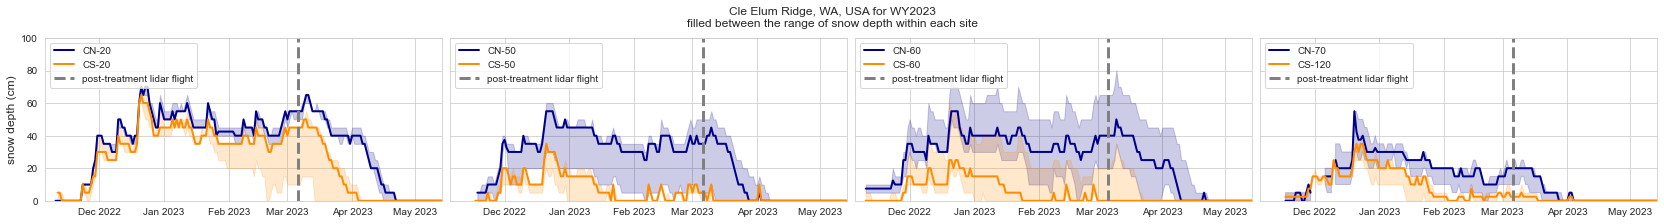

In [6]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,4,figsize = (23,3), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[0].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[1].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[2].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[0].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[1].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[2].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[1].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[2].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[3].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[0].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[2].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[3].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
# ax[1].set_ylabel("snow depth (cm)", fontsize=12)
# ax[2].set_ylabel("snow depth (cm)", fontsize=12)
# ax[3].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')

plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_1140\3129241684.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(smn, cax = caxn, label = "")
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_1140\3129241684.py:57: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, cax = cax, label = 'Gap Fraction (%)')


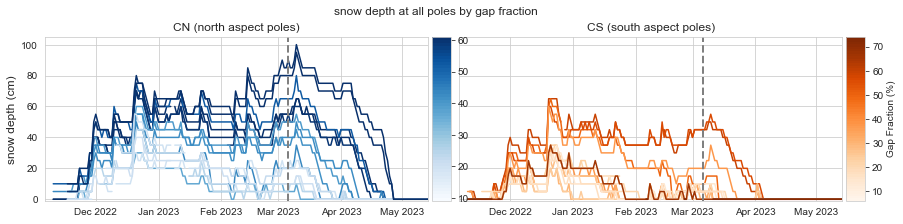

In [7]:
fig, ax = plt.subplots(1,2, figsize = (12,3), sharex=True, sharey=True, constrained_layout=True)

plt.suptitle("snow depth at all poles by gap fraction")

# NORTH _________________________________________________________________________________________________________________________
#The following code sets up the colorbar
dividern = make_axes_locatable(ax[0])
caxn = dividern.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CN23['SiteOpennessAdjusted'].max())-int(SDD_CN23['SiteOpennessAdjusted'].min())
cmapn = plt.get_cmap('Blues', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CN23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CN23['SiteOpennessAdjusted'].max()))
smn = plt.cm.ScalarMappable(cmap=cmapn, norm=norm)
smn.set_array([])
# plt.colorbar(smn, cax = caxn, label = "gap fraction (%)")
plt.colorbar(smn, cax = caxn, label = "")

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[0].plot(CN20['Date'], CN20['Pole1'], label = "CN-20-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole2'], label = "CN-20-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole3'], label = "CN-20-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN50['Date'], CN50['Pole1'], label = "CN-50-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole2'], label = "CN-50-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole3'], label = "CN-50-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN60['Date'], CN60['Pole1'], label = "CN-60-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole2'], label = "CN-60-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole3'], label = "CN-60-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN70['Date'], CN70['Pole1'], label = "CN-70-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole2'], label = "CN-70-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole3'], label = "CN-70-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNF23['Date'], CNF23['Pole1'], label = "CN-F-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole2'], label = "CN-F-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole3'], label = "CN-F-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNG23['Date'], CNG23['Pole1'], label = "CN-G-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole2'], label = "CN-G-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole3'], label = "CN-G-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole3",'SiteOpennessAdjusted'])))

ax[0].set_ylim(-1,105)
ax[0].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[0].set_title("CN (north aspect poles)")

# SOUTH _________________________________________________________________________________________________   
#The following code sets up the colorbar
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CS23['SiteOpennessAdjusted'].max())-int(SDD_CS23['SiteOpennessAdjusted'].min())
cmap = plt.get_cmap('Oranges', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CS23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CS23['SiteOpennessAdjusted'].max()))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, cax = cax, label = 'Gap Fraction (%)')

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[1].plot(CS20['Date'], CS20['Pole1'], label = "CS-20-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole2'], label = "CS-20-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole3'], label = "CS-20-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS50['Date'], CS50['Pole1'], label = "CS-50-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole2'], label = "CS-50-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole3'], label = "CS-50-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS60['Date'], CS60['Pole1'], label = "CS-60-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole2'], label = "CS-60-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole3'], label = "CS-60-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS120['Date'], CS120['Pole1'], label = "CS-120-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole2'], label = "CS-120-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole3'], label = "CS-120-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSF23['Date'], CSF23['Pole1'], label = "CS-F-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole2'], label = "CS-F-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole3'], label = "CS-F-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSG23['Date'], CSG23['Pole1'], label = "CS-G-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSG23['Date'], CSG23['Pole2'], label = "CS-G-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2",'SiteOpennessAdjusted'])))
#ax[1].plot(CSG23['Date'], CSG23['Pole3'], label = "CS-G-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole3",'SiteOpennessAdjusted'])))
# there is no site openness value for the above pole and therefore it is excluded from the plot

ax[1].set_ylim(-1,105)
ax[1].set_xlim([datetime.date(2022, 11, 6), datetime.date(2023, 5, 14)])
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
# ax[1].set_ylabel("snow depth (cm), fontsize=12")
ax[1].set_title("CS (south aspect poles)")

# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)

# ax[0].legend(loc='upper left')
# ax[1].legend(loc='upper left')

# ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

# Cumulative Gain and Loss 

Previous function from Steven, working off of this.

In [9]:
## Previous code from Steven
# def cumulative_gain_loss(x, y):
    
#     # calculate the difference in y values between each time step x
#     delta_y = np.diff(y)
    
#     # calculate the cumulative sum for all delta_y where the change was positive
#     gains = np.cumsum(delta_y[delta_y > 0])
#     # get the time steps (x coordinates) when those positive changes happened
#     x_gains = x[1:][delta_y > 0]
    
#     # calculate the cumulative sum for all delta_y where the change was negative
#     losses = np.cumsum(delta_y[delta_y < 0])
#     # get the time steps (x coordinates) when those negative changes happened
#     x_losses = x[1:][delta_y < 0]
    
#     return (x_gains, gains), (x_losses, losses)

First, make all the matching north and south datasets into tidy pandas dataframes.

In [147]:
# create a new dataframe for each BAF group
C20 = pd.DataFrame({'date': CS20['Date'], 'hs_s': CS20['Median_depth'], 'hs_n': CN20['Median_depth']})
C20.set_index('date', inplace=True)

C50 = pd.DataFrame({'date': CS50['Date'], 'hs_s': CS50['Median_depth'], 'hs_n': CN50['Median_depth']})
C50.set_index('date', inplace=True)

C60 = pd.DataFrame({'date': CS60['Date'], 'hs_s': CS60['Median_depth'], 'hs_n': CN60['Median_depth']})
C60.set_index('date', inplace=True)

# putting 120 and 70 together
C70 = pd.DataFrame({'date': CS120['Date'], 'hs_s': CS120['Median_depth'], 'hs_n': CN70['Median_depth']})
C70.set_index('date', inplace=True)

# forest and gap sites
CF = pd.DataFrame({'date': CSF23['Date'], 'hs_s': CSF23['Median_depth'], 'hs_n': CNF23['Median_depth']})
CF.set_index('date', inplace=True)

CG = pd.DataFrame({'date': CSG23['Date'], 'hs_s': CSG23['Median_depth'], 'hs_n': CNG23['Median_depth']})
CG.set_index('date', inplace=True)


In [124]:
C20.head()

,hs_s,hs_n
date,,
NaT,NaN,0.0
2022-11-11,5.0,0.0
2022-11-12,5.0,0.0
2022-11-13,0.0,0.0
2022-11-14,0.0,0.0


In [148]:
# First, testing with one of the sites
C20['delta_hs_s'] = C20['hs_s'].diff()
C20['gains_hs_s'] = np.cumsum(C20['delta_hs_s'][C20['delta_hs_s'] > 0])
C20['losses_hs_s'] = np.cumsum(C20['delta_hs_s'][C20['delta_hs_s'] < 0])

C20['delta_hs_n'] = C20['hs_n'].diff()
C20['gains_hs_n'] = np.cumsum(C20['delta_hs_n'][C20['delta_hs_n'] > 0])
C20['losses_hs_n'] = np.cumsum(C20['delta_hs_n'][C20['delta_hs_n'] < 0])

# where there is no gain between the gain values, then fill with the last value
C20['gains_hs_s'] = C20['gains_hs_s'].fillna(method='ffill')
C20['gains_hs_n'] = C20['gains_hs_n'].fillna(method='ffill')

# where there is no loss between the loss values, then fill with the last value
C20['losses_hs_s'] = C20['losses_hs_s'].fillna(method='ffill')
C20['losses_hs_n'] = C20['losses_hs_n'].fillna(method='ffill')

# now, set all the values to nan for the loss and gain calculations once one of the snow depth datasets are 0
C20.loc[C20['hs_s'] == 0, ['gains_hs_s', 'losses_hs_s']] = np.nan
C20.loc[C20['hs_n'] == 0, ['gains_hs_n', 'losses_hs_n']] = np.nan

C20.loc[C20['hs_n'] == 0, ['gains_hs_s', 'losses_hs_s']] = np.nan
C20.loc[C20['hs_s'] == 0, ['gains_hs_n', 'losses_hs_n']] = np.nan

In [135]:
C20.head()

,hs_s,hs_n,delta_hs_s,gains_hs_s,losses_hs_s,delta_hs_n,gains_hs_n,losses_hs_n
date,,,,,,,,
NaT,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-11,5.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN
2022-11-12,5.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
2022-11-13,0.0,0.0,-5.0,NaN,NaN,0.0,NaN,NaN
2022-11-14,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN


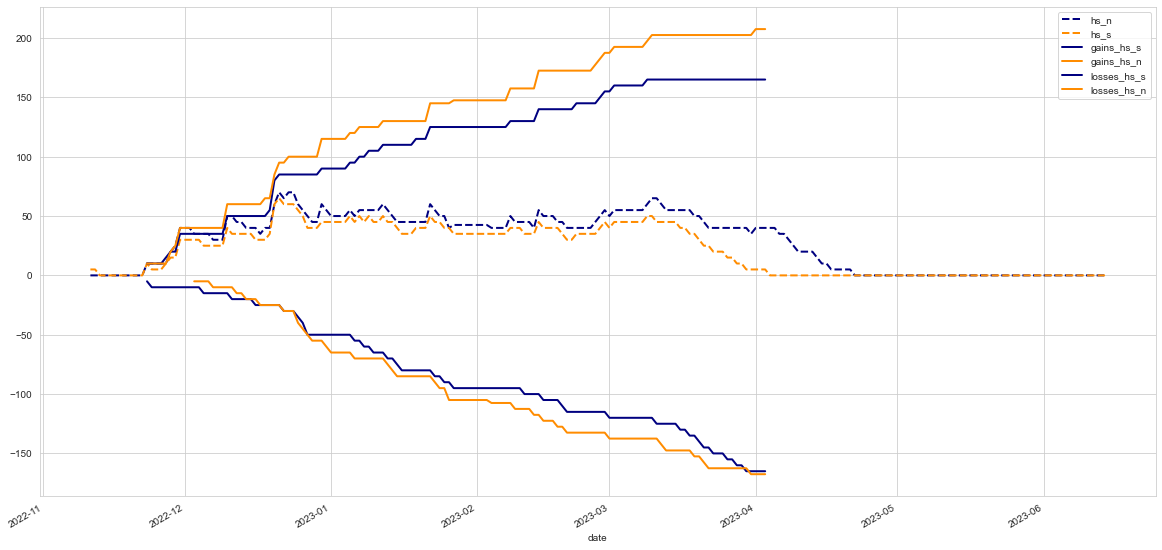

In [140]:
# set figure size 
fig = plt.figure(figsize=(20, 10))

C20['hs_n'].plot(color='navy', linewidth=2, linestyle='dashed')
C20['hs_s'].plot(color='darkorange', linewidth=2, linestyle='dashed')

C20['gains_hs_s'].plot(color='navy', linewidth=2)
C20['gains_hs_n'].plot(color='darkorange', linewidth=2)
C20['losses_hs_s'].plot(color='navy', linewidth=2)
C20['losses_hs_n'].plot(color='darkorange', linewidth=2)

plt.legend()

Now, make that code into a function. 

In [250]:
def cumulative_gain_loss(df):
    df['delta_hs_s'] = df['hs_s'].diff()
    df['gains_hs_s'] = np.cumsum(df['delta_hs_s'][df['delta_hs_s'] > 0])
    df['losses_hs_s'] = np.cumsum(df['delta_hs_s'][df['delta_hs_s'] < 0])

    df['delta_hs_n'] = df['hs_n'].diff()
    df['gains_hs_n'] = np.cumsum(df['delta_hs_n'][df['delta_hs_n'] > 0])
    df['losses_hs_n'] = np.cumsum(df['delta_hs_n'][df['delta_hs_n'] < 0])

    # where there is no gain between the gain values, then fill with the last value
    df['gains_hs_s'] = df['gains_hs_s'].fillna(method='ffill')
    df['gains_hs_n'] = df['gains_hs_n'].fillna(method='ffill')

    # where there is no loss between the loss values, then fill with the last value
    df['losses_hs_s'] = df['losses_hs_s'].fillna(method='ffill')
    df['losses_hs_n'] = df['losses_hs_n'].fillna(method='ffill')

    # now, set all the values to nan for the loss and gain calculations once one of the snow depth datasets are 0
    df.loc[df['hs_s'] == 0, ['gains_hs_s', 'losses_hs_s']] = np.nan
    df.loc[df['hs_n'] == 0, ['gains_hs_n', 'losses_hs_n']] = np.nan

    df.loc[df['hs_n'] == 0, ['gains_hs_s', 'losses_hs_s']] = np.nan
    df.loc[df['hs_s'] == 0, ['gains_hs_n', 'losses_hs_n']] = np.nan

    return df 

In [251]:
C20 = cumulative_gain_loss(C20)
C50 = cumulative_gain_loss(C50)
C60 = cumulative_gain_loss(C60)
C70 = cumulative_gain_loss(C70)
CF = cumulative_gain_loss(CF)
CG = cumulative_gain_loss(CG)

### Make individual plots for all the sites

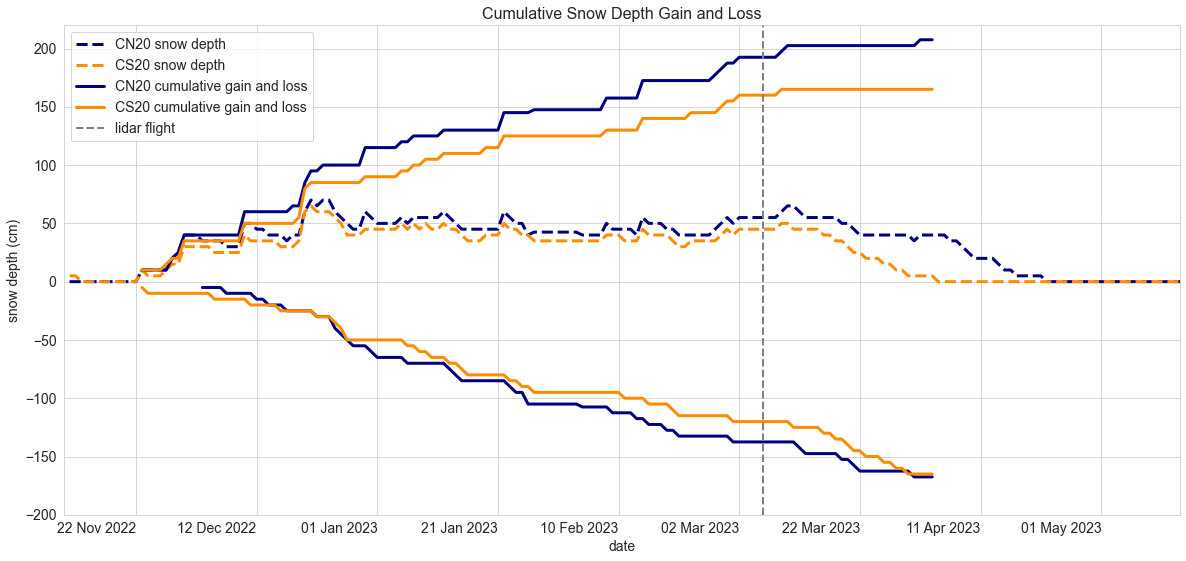

In [252]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3

C20['hs_n'].plot(label = 'CN20 snow depth', color='navy', linewidth=linewidth, linestyle='dashed')
C20['hs_s'].plot(label = 'CS20 snow depth', color='darkorange', linewidth=linewidth, linestyle='dashed')

C20['gains_hs_n'].plot( label = 'CN20 cumulative gain and loss', color='navy', linewidth=linewidth)
C20['gains_hs_s'].plot( label = 'CS20 cumulative gain and loss', color='darkorange', linewidth=linewidth)
C20['losses_hs_n'].plot(label = '', color='navy', linewidth=linewidth)
C20['losses_hs_s'].plot(label = '', color='darkorange', linewidth=linewidth)

# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)
plt.legend(loc='upper left', fontsize=14)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))

# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.ylim(-200, 220)

plt.show()

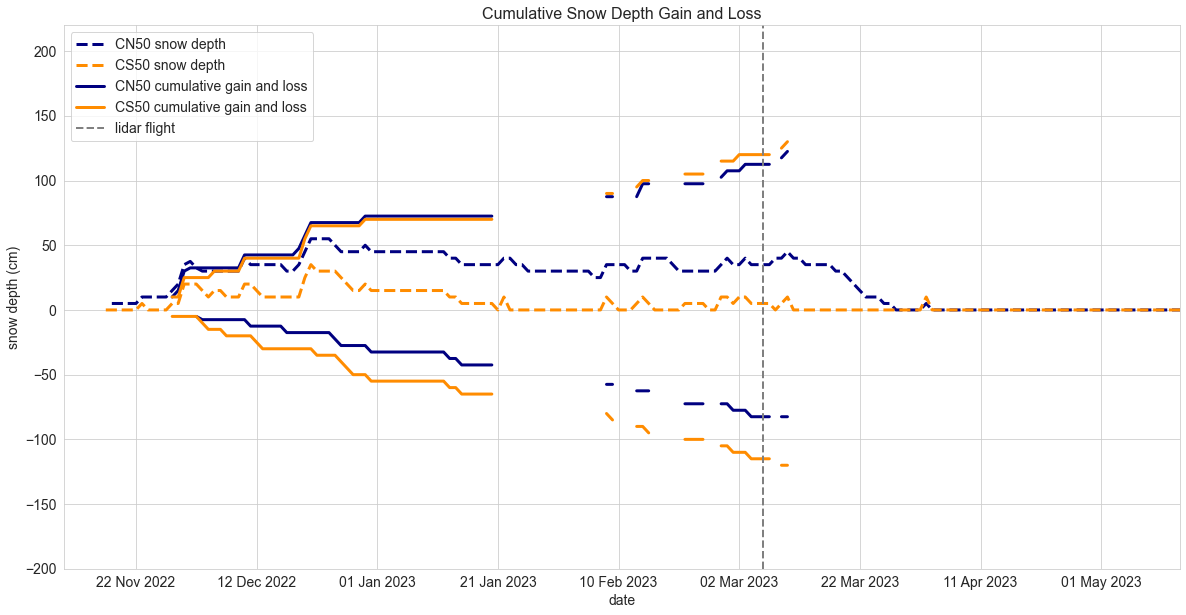

In [226]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3

C50['hs_n'].plot(label = 'CN50 snow depth', color='navy', linewidth=linewidth, linestyle='dashed')
C50['hs_s'].plot(label = 'CS50 snow depth', color='darkorange', linewidth=linewidth, linestyle='dashed')

C50['gains_hs_n'].plot( label = 'CN50 cumulative gain and loss', color='navy', linewidth=linewidth)
C50['gains_hs_s'].plot( label = 'CS50 cumulative gain and loss', color='darkorange', linewidth=linewidth)
C50['losses_hs_n'].plot(label = '', color='navy', linewidth=linewidth)
C50['losses_hs_s'].plot(label = '', color='darkorange', linewidth=linewidth)

# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)
plt.legend(loc='upper left', fontsize=14)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))

# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.ylim(-200, 220)

plt.show()

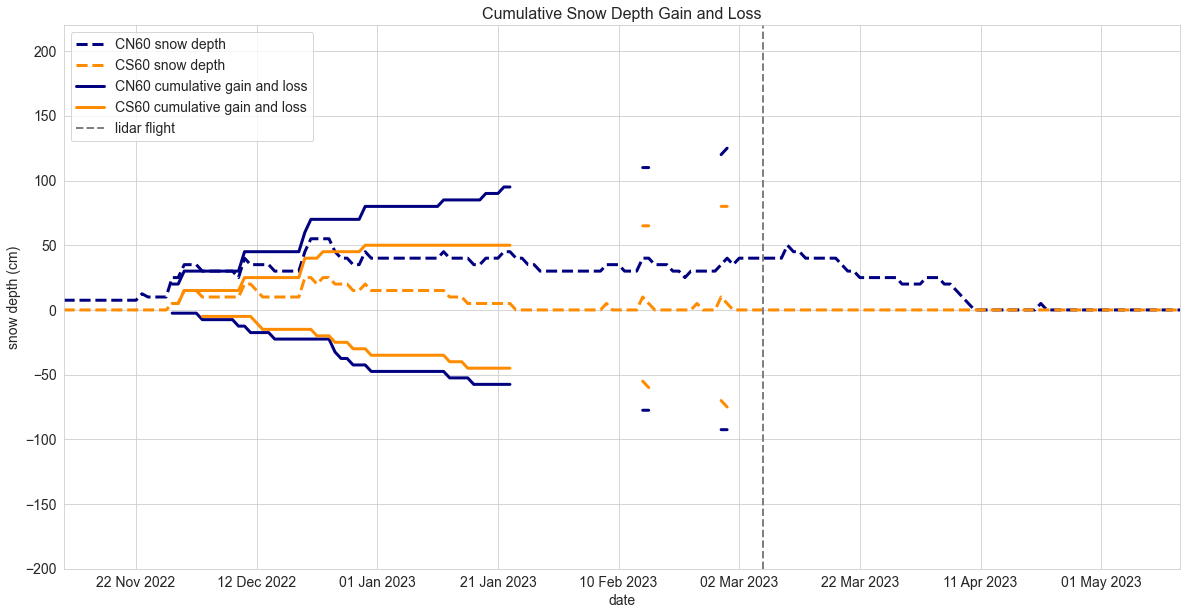

In [227]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3

C60['hs_n'].plot(label = 'CN60 snow depth', color='navy', linewidth=linewidth, linestyle='dashed')
C60['hs_s'].plot(label = 'CS60 snow depth', color='darkorange', linewidth=linewidth, linestyle='dashed')

C60['gains_hs_n'].plot( label = 'CN60 cumulative gain and loss', color='navy', linewidth=linewidth)
C60['gains_hs_s'].plot( label = 'CS60 cumulative gain and loss', color='darkorange', linewidth=linewidth)
C60['losses_hs_n'].plot(label = '', color='navy', linewidth=linewidth)
C60['losses_hs_s'].plot(label = '', color='darkorange', linewidth=linewidth)

# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)
plt.legend(loc='upper left', fontsize=14)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))

# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.ylim(-200, 220)

plt.show()

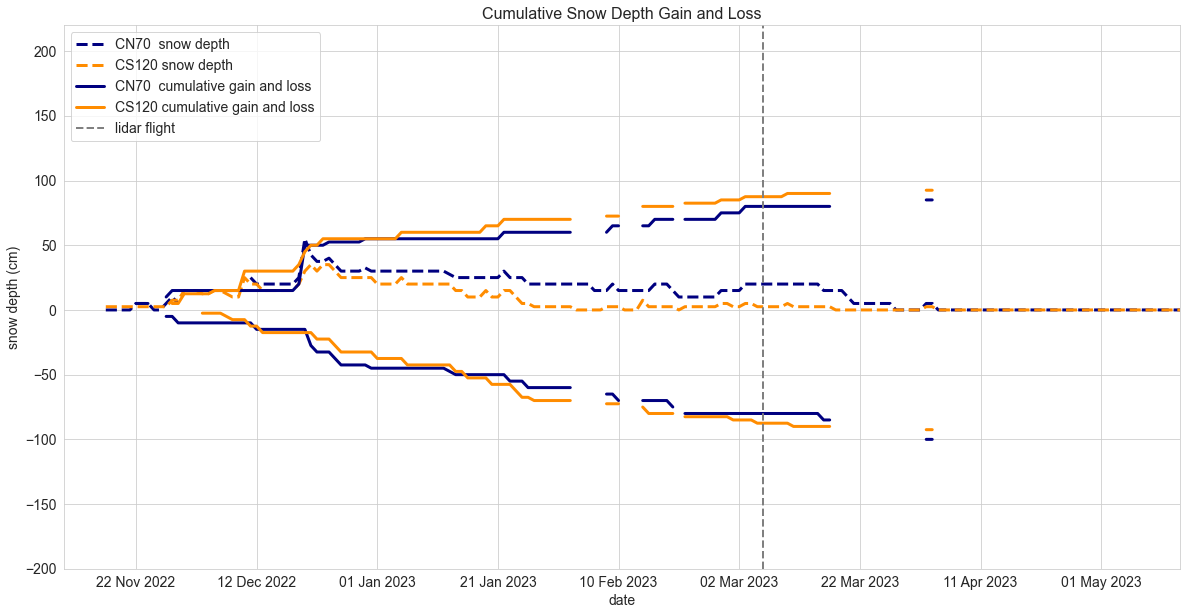

In [228]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3

C70['hs_n'].plot(label = 'CN70  snow depth', color='navy', linewidth=linewidth, linestyle='dashed')
C70['hs_s'].plot(label = 'CS120 snow depth', color='darkorange', linewidth=linewidth, linestyle='dashed')

C70['gains_hs_n'].plot( label = 'CN70  cumulative gain and loss', color='navy', linewidth=linewidth)
C70['gains_hs_s'].plot( label = 'CS120 cumulative gain and loss', color='darkorange', linewidth=linewidth)
C70['losses_hs_n'].plot(label = '', color='navy', linewidth=linewidth)
C70['losses_hs_s'].plot(label = '', color='darkorange', linewidth=linewidth)

# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)
plt.legend(loc='upper left', fontsize=14)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))

# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.ylim(-200, 220)

plt.show()

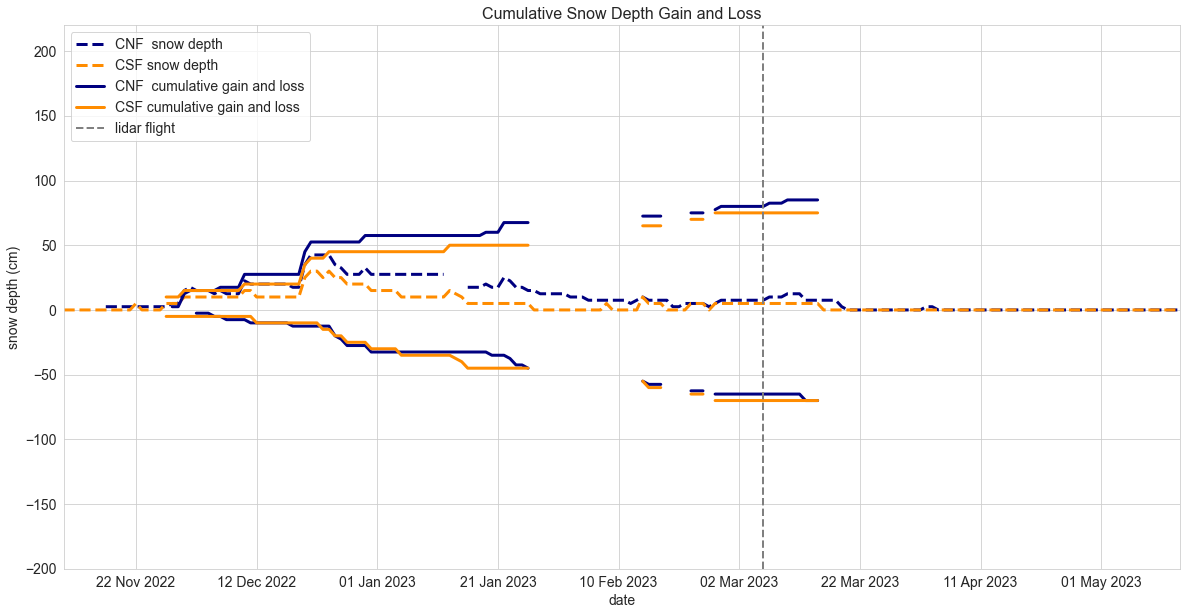

In [229]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3

CF['hs_n'].plot(label = 'CNF  snow depth', color='navy', linewidth=linewidth, linestyle='dashed')
CF['hs_s'].plot(label = 'CSF snow depth', color='darkorange', linewidth=linewidth, linestyle='dashed')

CF['gains_hs_n'].plot( label = 'CNF  cumulative gain and loss', color='navy', linewidth=linewidth)
CF['gains_hs_s'].plot( label = 'CSF cumulative gain and loss', color='darkorange', linewidth=linewidth)
CF['losses_hs_n'].plot(label = '', color='navy', linewidth=linewidth)
CF['losses_hs_s'].plot(label = '', color='darkorange', linewidth=linewidth)

# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)
plt.legend(loc='upper left', fontsize=14)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))

# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.ylim(-200, 220)

plt.show()

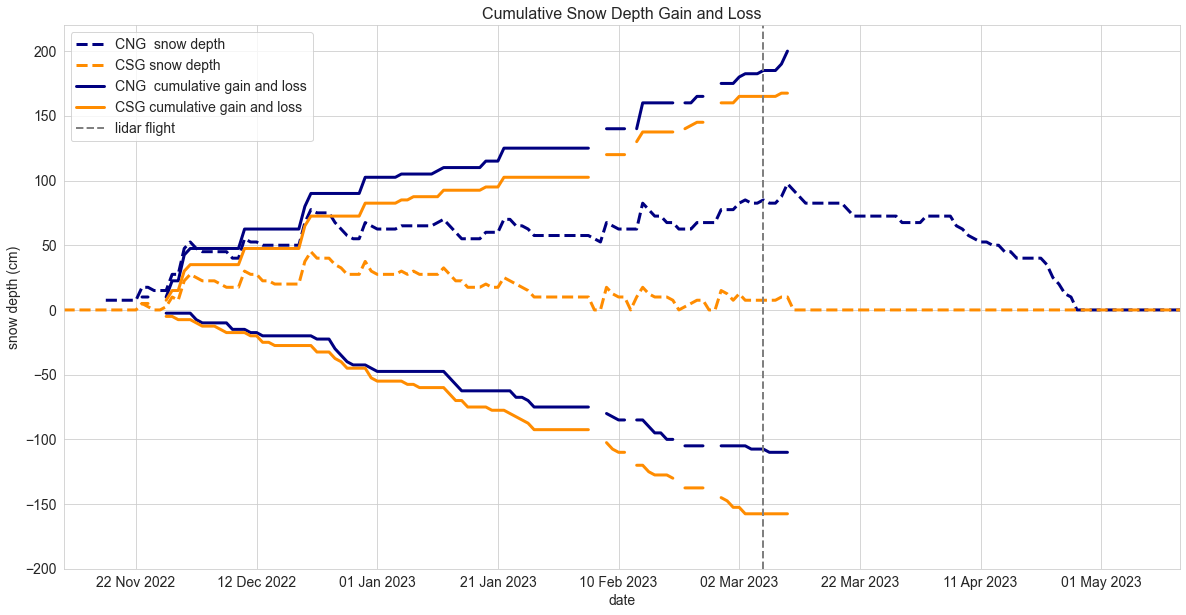

In [230]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3

CG['hs_n'].plot(label = 'CNG  snow depth', color='navy', linewidth=linewidth, linestyle='dashed')
CG['hs_s'].plot(label = 'CSG snow depth', color='darkorange', linewidth=linewidth, linestyle='dashed')

CG['gains_hs_n'].plot( label = 'CNG  cumulative gain and loss', color='navy', linewidth=linewidth)
CG['gains_hs_s'].plot( label = 'CSG cumulative gain and loss', color='darkorange', linewidth=linewidth)
CG['losses_hs_n'].plot(label = '', color='navy', linewidth=linewidth)
CG['losses_hs_s'].plot(label = '', color='darkorange', linewidth=linewidth)

# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)
plt.legend(loc='upper left', fontsize=14)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))

# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.ylim(-200, 220)

plt.show()

## Put all of these together on a single plot

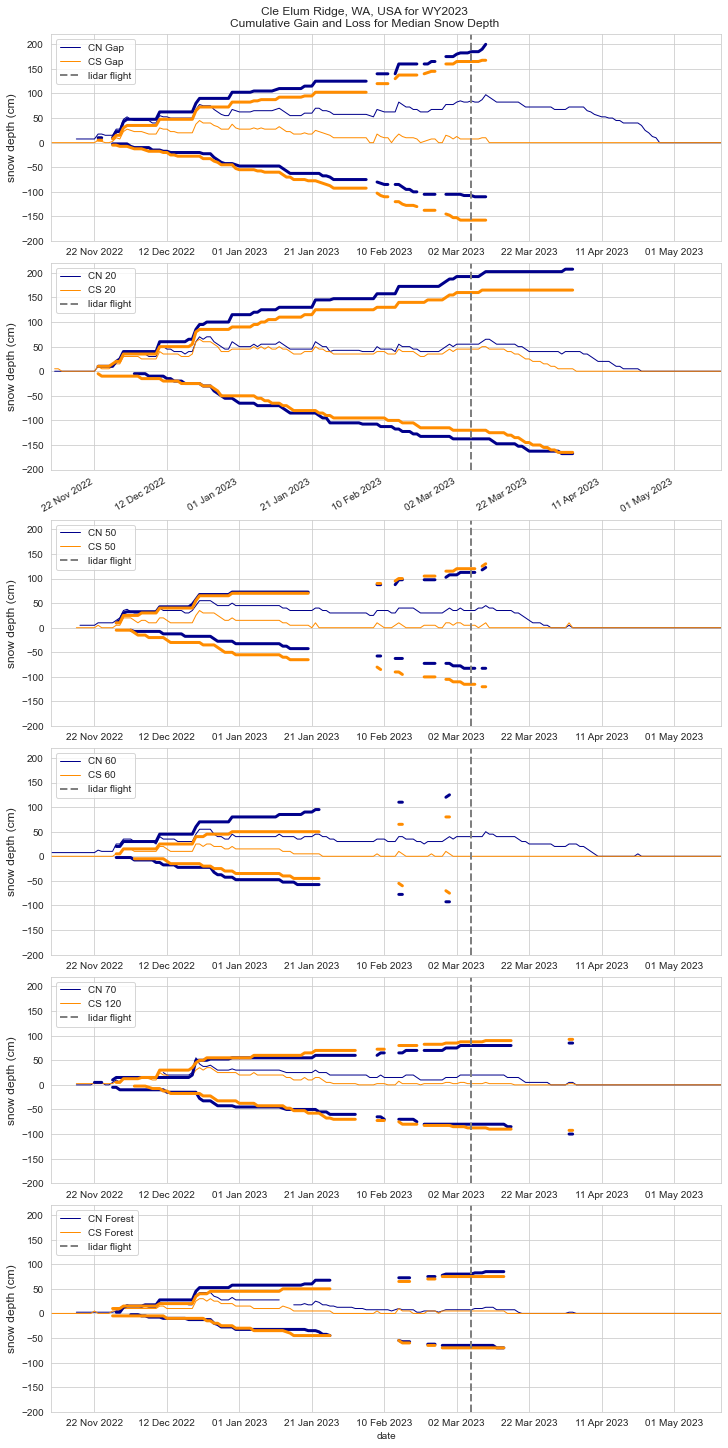

In [253]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, axes = plt.subplots(6,1, figsize = (10,20), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'
linewidth  = 3
linewidth2 = 1

# C-Gap
CG['hs_n'].plot(ax=axes[0], label = 'CN Gap', color=colornorth, linewidth=linewidth2)
CG['hs_s'].plot(ax=axes[0], label = 'CS Gap', color=colorsouth, linewidth=linewidth2)

CG['gains_hs_n'].plot(ax=axes[0],  label = '', color=colornorth, linewidth=linewidth)
CG['gains_hs_s'].plot(ax=axes[0],  label = '', color=colorsouth, linewidth=linewidth)
CG['losses_hs_n'].plot(ax=axes[0], label = '', color=colornorth, linewidth=linewidth)
CG['losses_hs_s'].plot(ax=axes[0], label = '', color=colorsouth, linewidth=linewidth)

# C-20
C20['hs_n'].plot(ax=axes[1], label = 'CN 20', color=colornorth, linewidth=linewidth2)
C20['hs_s'].plot(ax=axes[1], label = 'CS 20', color=colorsouth, linewidth=linewidth2)

C20['gains_hs_n'].plot(ax=axes[1],  label = '', color=colornorth, linewidth=linewidth)
C20['gains_hs_s'].plot(ax=axes[1],  label = '', color=colorsouth, linewidth=linewidth)
C20['losses_hs_n'].plot(ax=axes[1], label = '', color=colornorth, linewidth=linewidth)
C20['losses_hs_s'].plot(ax=axes[1], label = '', color=colorsouth, linewidth=linewidth)

# C-50
C50['hs_n'].plot(ax=axes[2], label = 'CN 50', color=colornorth, linewidth=linewidth2)
C50['hs_s'].plot(ax=axes[2], label = 'CS 50', color=colorsouth, linewidth=linewidth2)

C50['gains_hs_n'].plot(ax=axes[2],  label = '', color=colornorth, linewidth=linewidth)
C50['gains_hs_s'].plot(ax=axes[2],  label = '', color=colorsouth, linewidth=linewidth)
C50['losses_hs_n'].plot(ax=axes[2], label = '', color=colornorth, linewidth=linewidth)
C50['losses_hs_s'].plot(ax=axes[2], label = '', color=colorsouth, linewidth=linewidth)

# C-60
C60['hs_n'].plot(ax=axes[3], label = 'CN 60', color=colornorth, linewidth=linewidth2)
C60['hs_s'].plot(ax=axes[3], label = 'CS 60', color=colorsouth, linewidth=linewidth2)

C60['gains_hs_n'].plot(ax=axes[3],  label = '', color=colornorth, linewidth=linewidth)
C60['gains_hs_s'].plot(ax=axes[3],  label = '', color=colorsouth, linewidth=linewidth)
C60['losses_hs_n'].plot(ax=axes[3], label = '', color=colornorth, linewidth=linewidth)
C60['losses_hs_s'].plot(ax=axes[3], label = '', color=colorsouth, linewidth=linewidth)

# C-70 and 120
C70['hs_n'].plot(ax=axes[4], label = 'CN 70', color=colornorth, linewidth=linewidth2)
C70['hs_s'].plot(ax=axes[4], label = 'CS 120', color=colorsouth, linewidth=linewidth2)

C70['gains_hs_n'].plot(ax=axes[4],  label = '', color=colornorth, linewidth=linewidth)
C70['gains_hs_s'].plot(ax=axes[4],  label = '', color=colorsouth, linewidth=linewidth)
C70['losses_hs_n'].plot(ax=axes[4], label = '', color=colornorth, linewidth=linewidth)
C70['losses_hs_s'].plot(ax=axes[4], label = '', color=colorsouth, linewidth=linewidth)

# C-Forest
CF['hs_n'].plot(ax=axes[5], label = 'CN Forest', color=colornorth, linewidth=linewidth2)
CF['hs_s'].plot(ax=axes[5], label = 'CS Forest', color=colorsouth, linewidth=linewidth2)

CF['gains_hs_n'].plot(ax=axes[5],  label = '', color=colornorth, linewidth=linewidth)
CF['gains_hs_s'].plot(ax=axes[5],  label = '', color=colorsouth, linewidth=linewidth)
CF['losses_hs_n'].plot(ax=axes[5], label = '', color=colornorth, linewidth=linewidth)
CF['losses_hs_s'].plot(ax=axes[5], label = '', color=colorsouth, linewidth=linewidth)


# add lidar data flights
axes[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)
axes[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)
axes[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)
axes[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)
axes[4].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)
axes[5].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)


# set plotting constants
axes[0].set_ylim(-200,220)

axes[0].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
axes[1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
axes[2].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
axes[3].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
axes[4].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
axes[5].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])

axes[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
axes[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
axes[2].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
axes[3].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
axes[4].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
axes[5].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

axes[0].set_ylabel("snow depth (cm)", fontsize=12)
axes[1].set_ylabel("snow depth (cm)", fontsize=12)
axes[2].set_ylabel("snow depth (cm)", fontsize=12)
axes[3].set_ylabel("snow depth (cm)", fontsize=12)
axes[4].set_ylabel("snow depth (cm)", fontsize=12)
axes[5].set_ylabel("snow depth (cm)", fontsize=12)

axes[0].set_xlabel(''); axes[1].set_xlabel(''); axes[2].set_xlabel(''); axes[3].set_xlabel(''); axes[4].set_xlabel('')

# add visible tik marks on the x-axis
axes[0].xaxis.set_major_locator(dates.DayLocator(interval=20))
axes[1].xaxis.set_major_locator(dates.DayLocator(interval=20))
axes[2].xaxis.set_major_locator(dates.DayLocator(interval=20))
axes[3].xaxis.set_major_locator(dates.DayLocator(interval=20))
axes[4].xaxis.set_major_locator(dates.DayLocator(interval=20))
axes[5].xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nCumulative Gain and Loss for Median Snow Depth")

axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
axes[2].legend(loc='upper left')
axes[3].legend(loc='upper left')
axes[4].legend(loc='upper left')
axes[5].legend(loc='upper left')

# axes[1].set_xticks(fontsize=14, rotation =360)

plt.show()